My Data is a dataset sourced from https://hbiostat.org/data/ or without the link, Vanderbilt's biostatistics department, which has 1309 names of passengers who were on the titanic along with summary statistics of them (which class they were in, their age, their gender, name, how many people were traveling with them, which type of people were traveling with them, and most importantly wether or not they survived. Some questions I am interested in would be how much more likely would a woman be likely to survive compared to a man? how much more likely would a child be to survive compared to working age people? how much more likely would it be for a wealthier individual to survive compared to a poorer individaul? how much more likely would one be to survive if they were travelling alone compared to in a larger group, and if people were deprioritised for traveling in a group, is there some "sweet spot" where you would be more likely to survive in a group than otherwise?

In [ ]:
#data analysis libraries 
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy.stats.mstats import kruskal
from scipy.stats import mannwhitneyu
import statistics
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
print(train.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [ ]:
train.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
285,1,0,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,NaN,96.0,"New York, NY"
248,1,0,"Rowe, Mr. Alfred G",male,33.0,0,0,113790,26.5500,NaN,S,NaN,109.0,London
547,2,0,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C,NaN,NaN,"Paris / Montreal, PQ"
442,2,0,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S,NaN,NaN,"West Hampstead, London / Neepawa, MB"
546,2,1,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,9,NaN,Spain


In [ ]:
train.describe(include = "all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,AgeGroup
count,1305.000000,1305.000000,1305,1305,1305.000000,1305.000000,1305.000000,1305,1305.000000,1305.0,1305,1305.0,1305.000000,1305.0,1305
unique,NaN,NaN,1305,2,NaN,NaN,NaN,925,NaN,187.0,3,28.0,NaN,370.0,7
top,NaN,NaN,"Tornquist, Mr. William Henry",male,NaN,NaN,NaN,CA. 2343,NaN,-0.5,S,-0.5,NaN,-0.5,Young Adult
freq,NaN,NaN,1,841,NaN,NaN,NaN,11,NaN,1010.0,915,820.0,NaN,562.0,577
mean,2.292720,0.382375,NaN,NaN,29.870605,0.500383,0.386207,NaN,33.373641,NaN,NaN,NaN,14.402682,NaN,NaN
std,0.838208,0.486154,NaN,NaN,12.894527,1.042888,0.866624,NaN,51.798892,NaN,NaN,NaN,55.378595,NaN,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,-0.500000,NaN,NaN
25%,2.000000,0.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,-0.500000,NaN,NaN
50%,3.000000,0.000000,NaN,NaN,29.870605,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,-0.500000,NaN,NaN
75%,3.000000,1.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,-0.500000,NaN,NaN


In [ ]:
train.sort_values("name", inplace = True)

In [ ]:
train.drop_duplicates(subset ="name",
                     keep = False, inplace = True)

In [ ]:
train.describe(include = "all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1305.000000,1305.000000,1305,1305,1305.000000,1305.000000,1305.000000,1305,1305.000000,295,1305,1305.0,1305.000000,743
unique,NaN,NaN,1305,2,NaN,NaN,NaN,925,NaN,186,3,28.0,NaN,369
top,NaN,NaN,"Tornquist, Mr. William Henry",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,-0.5,NaN,"New York, NY"
freq,NaN,NaN,1,841,NaN,NaN,NaN,11,NaN,6,915,820.0,NaN,64
mean,2.292720,0.382375,NaN,NaN,29.870605,0.500383,0.386207,NaN,33.373641,NaN,NaN,NaN,14.402682,NaN
std,0.838208,0.486154,NaN,NaN,12.894527,1.042888,0.866624,NaN,51.798892,NaN,NaN,NaN,55.378595,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,-0.500000,NaN
25%,2.000000,0.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,-0.500000,NaN
50%,3.000000,0.000000,NaN,NaN,29.870605,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,-0.500000,NaN
75%,3.000000,1.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,-0.500000,NaN


In [ ]:
train['embarked'].fillna(value='S', inplace=True)

I chose to assume those without a written embarked from location left from southhampton, because 913/1303 departed from southhampton

In [ ]:
mean_value_age=train['age'].mean()
train['age'].fillna(value=mean_value_age, inplace=True)

In [ ]:
mean_value_fare=train['fare'].mean()
train['fare'].fillna(value=mean_value_fare, inplace=True)

In [ ]:
train['boat'].fillna(value=-.5, inplace=True)

In [ ]:
train['body'].fillna(value=-.5, inplace=True)

In [ ]:
train['cabin'].fillna(value=-.5, inplace=True)

In [ ]:
train['home.dest'].fillna(value=-.5, inplace=True)

For the variables where NaN was replaced with a -.5, this was because they are descriptive variables or outcome variables, so no assumptions could be made as to what to put within the columns, so -.5 is being used to seperate it.

In [ ]:
print(pd.isnull(train).sum())

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


Percentage of females who survived: 72.84482758620689
Percentage of males who survived: 19.14387633769322


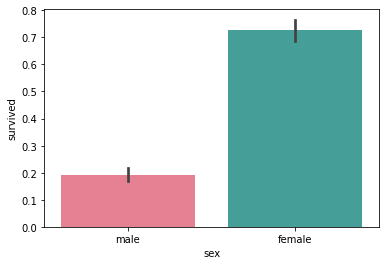

In [ ]:
sns.barplot(x="sex", y="survived", data=train, palette="husl")

print("Percentage of females who survived:", train["survived"][train["sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["survived"][train["sex"] == 'male'].value_counts(normalize = True)[1]*100)

Females were over 50% more likely to survive compared to their male counterparts. 

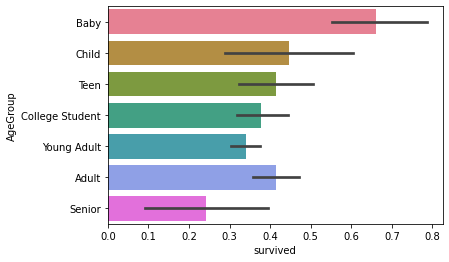

Percentage of babies who survived: 66.07142857142857
Percentage of children who survived: 44.73684210526316
Percentage of Teens who survived: 41.41414141414141
Percentage of college age students who survived: 37.850467289719624
Percentage of young adults who survived: 33.96880415944541
Percentage of adults who survived: 41.31944444444444
Percentage of seniors who survived: 24.242424242424242


In [ ]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teen', 'College Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["age"], bins, labels = labels)
sns.barplot(x="survived", y="AgeGroup", data=train, palette="husl")
plt.show()
#For data where age is missing I used fillna(train.mean()) Which places the previously unknown people into the Adult categorey. While I don't believe this should cause many problems, I will also do a graph seperating people with unknown ages from adults.
#Age Groups:Baby (0,5), Child (5, 12), Teen (12, 18) ,Student (18-24), YAdult(24, 35), Adult(35, 60), Senior(x > 60) 
print("Percentage of babies who survived:", train["survived"][train["AgeGroup"] == 'Baby'].value_counts(normalize = True)[1]*100)
print("Percentage of children who survived:", train["survived"][train["AgeGroup"] == 'Child'].value_counts(normalize = True)[1]*100)
print("Percentage of Teens who survived:", train["survived"][train["AgeGroup"] == 'Teen'].value_counts(normalize = True)[1]*100)
print("Percentage of college age students who survived:", train["survived"][train["AgeGroup"] == 'College Student'].value_counts(normalize = True)[1]*100)
print("Percentage of young adults who survived:", train["survived"][train["AgeGroup"] == 'Young Adult'].value_counts(normalize = True)[1]*100)
print("Percentage of adults who survived:", train["survived"][train["AgeGroup"] == 'Adult'].value_counts(normalize = True)[1]*100)
print("Percentage of seniors who survived:", train["survived"][train["AgeGroup"] == 'Senior'].value_counts(normalize = True)[1]*100)

Based on this data, the most likely to survive group was babies aged 0-5, which isn't surprising since a natural instinct and assumption would be to protect your kids and the younger people to make sure they make it out alive. Surprisingly however, this did not continue to be the trend throughout the whole graph, with young adults (24-35) being the second most likely to not survive, nearly 8% behind adults in general.

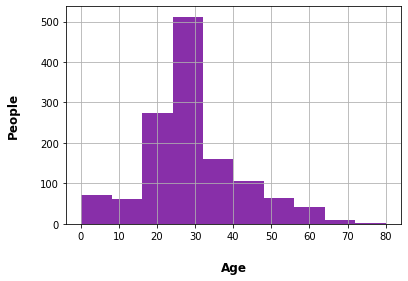

In [ ]:
p4 = train.hist(column='age', color='#882FA9')
p4 = p4[0]
for x in p4:
    x.set_title("")
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)
    x.set_ylabel("People", labelpad=20, weight='bold', size=12)


Using a histogram potentially shows part of the reason, with the largest concentration of people being within the young adult age group.

In [ ]:
#train["Age"] = train["age"].fillna(-0.5)
#test["Age"] = test["Age"].fillna(-0.5)
#bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
#labels = ['Unknown', 'Baby', 'Child', 'Teen', 'College Student', 'Young Adult', 'Adult', 'Senior']
#train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
#test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)
#sns.barplot(x="survived", y="AgeGroup", data=train, palette="husl")
#plt.show()
#print("Percentage of people of unknown ages who survived:", train["survived"][train["AgeGroup"] == 'Unknown'].value_counts(normalize = True)[1]*100)
#print("Percentage of babies who survived:", train["survived"][train["AgeGroup"] == 'Baby'].value_counts(normalize = True)[1]*100)
#print("Percentage of children who survived:", train["survived"][train["AgeGroup"] == 'Child'].value_counts(normalize = True)[1]*100)
#print("Percentage of Teens who survived:", train["survived"][train["AgeGroup"] == 'Teen'].value_counts(normalize = True)[1]*100)
#print("Percentage of college age students who survived:", train["survived"][train["AgeGroup"] == 'College Student'].value_counts(normalize = True)[1]*100)
#print("Percentage of young adults who survived:", train["survived"][train["AgeGroup"] == 'Young Adult'].value_counts(normalize = True)[1]*100)
#print("Percentage of adults who survived:", train["survived"][train["AgeGroup"] == 'Adult'].value_counts(normalize = True)[1]*100)
#print("Percentage of seniors who survived:", train["survived"][train["AgeGroup"] == 'Senior'].value_counts(normalize = True)[1]*100)

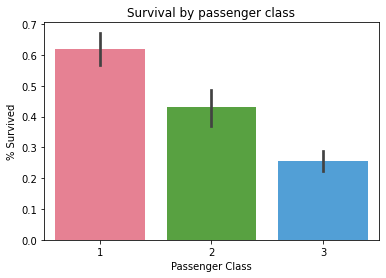

Percentage of People with first class tickets who survived: 61.91950464396285
Percentage of People with second class tickets who survived: 42.96028880866426
Percentage of People with third class tickets who survived: 25.52891396332863


In [ ]:
fig1 = sns.barplot(x="pclass", y="survived", data=train, palette="husl")
plt.xlabel("Passenger Class")
plt.ylabel("% Survived")
plt.title("Survival by passenger class") 
plt.show(fig1)
print("Percentage of People with first class tickets who survived:", train["survived"][train["pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of People with second class tickets who survived:", train["survived"][train["pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of People with third class tickets who survived:", train["survived"][train["pclass"] == 3].value_counts(normalize = True)[1]*100)

People who were placed in the higher passenger classes were far more likely to survive than those with lower classes, with an over 35% difference between how likely someone in First class was to survive opposed to Third class, and second class was nearly 20% more likely to survive than third but also nearly 20% less likely to survive than first class. This shows a clear discrepency in the disembarking procedure to benefit the wealthier passengers. This supports my earlier assumption that people with more money were far more likely to survive the disaster than those without.

Percentage of people with no spouse or sibling on board who survived: 34.68013468013468
Percentage of people with 1 spouse or sibling on board who survived: 51.09717868338558
Percentage of people with 2 spouses or siblings on board who survived: 45.23809523809524
Percentage of people with 3 spouses or siblings on board who survived: 30.0
Percentage of people with 4 spouses or siblings on board who survived: 13.636363636363635


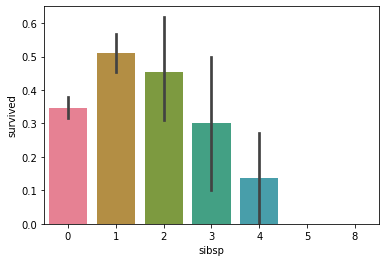

In [ ]:
sns.barplot(x="sibsp", y="survived", data=train, palette="husl")

#I won't be printing individual percent values for all of these.
print("Percentage of people with no spouse or sibling on board who survived:", train["survived"][train["sibsp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of people with 1 spouse or sibling on board who survived:", train["survived"][train["sibsp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of people with 2 spouses or siblings on board who survived:", train["survived"][train["sibsp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of people with 3 spouses or siblings on board who survived:", train["survived"][train["sibsp"] == 3].value_counts(normalize = True)[1]*100)
print("Percentage of people with 4 spouses or siblings on board who survived:", train["survived"][train["sibsp"] == 4].value_counts(normalize = True)[1]*100)

People with one spouse or sibling were surprisingly the most likely to survive, with people travelling alone being less likely than people with one spouse/sibling and two spouses/siblings which is very surprising, my assumption would be this is down to more men having travelled onto the ship alone, therefore them being deprioritised when compared to women and their husbands. 

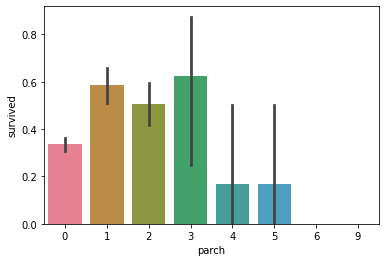

In [ ]:
sns.barplot(x="parch", y="survived", data=train, palette="husl")
plt.show()

The most likely group to survive was people with 3 parents of children on board, which is very surprising to me, this answers my "sweet spot" question I suppose but I don't necessarily understand why this would be the case. 

In [ ]:
# generate gaussian data samples
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# seed the random number generator
seed(1)
# generate two sets of univariate observations
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


In [ ]:
sampleSize = int(len(train)*(0.1))
sampleSize

130

In [179]:
medianValues = []

for i in range(130):
    boot1 = np.random.choice(train['age'],sampleSize)
    medianValues.append(np.median(boot1))
    
median_age = np.median(medianValues)
std_age = np.std(medianValues)

In [182]:
print('Sample median age: ' + str(median_age) + '\n' +
     'Population median age: ' + str(np.median(train['age'])) + '\n' +
     'Sample standard error for age: ' + str(std_age) + '\n' +
      'Population standard error age: ' + str(np.std(train['age'])/np.sqrt(num_samples)))

Sample median age: 29.87060460652591
Population median age: 29.87060460652591
Sample standard error for age: 0.4565770687533268
Population standard error age: 1.1304914796985766


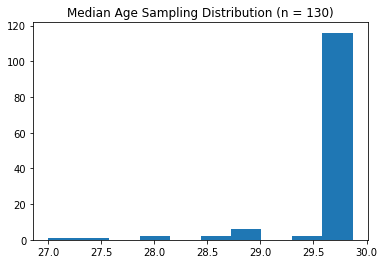

In [183]:
plt.hist(medianValues)
plt.title('Median Age Sampling Distribution (n = 130)')
plt.show()

In [184]:
medianValues = []

for i in range(130):
    boot1 = np.random.choice(train['age'],10)
    medianValues.append(np.median(boot1))
    
median_age = np.median(medianValues)
std_age = np.std(medianValues)

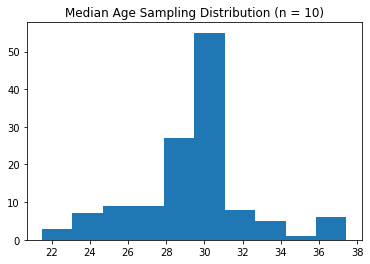

In [185]:
plt.hist(medianValues)
plt.title('Median Age Sampling Distribution (n = 10)')
plt.show()

In [177]:
kruskal(median_age, a.values)

TypeError: ignored

NameError: ignored